<a href="https://colab.research.google.com/github/Fernando2003L/Analisis-Numerico/blob/main/Proyecto_de_An%C3%A1lisis_Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Importación de las librerías para realizar cálculos matemáticos y gráficos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2. Definición de la función $f(t, P) = \frac{1}{3} ln \left( \frac{6}{5} \right)P$.

In [ ]:
def f(t, P):
    return (np.log(6/5) / 3) * P

**3. Implementación del método de Runge - Kutta de segundo orden.**

Primero se comienza con la definición de una función llamada *runge_kutta_2* que recibe como parametros:

$f$: Funcion derivada

$t_0$: Tiempo inicial

$P_0$: Población inicial

$h$: Tamaño del paso

$t_n$: Tiempo final

Se crean dos listas, *tiempo* y *poblacion*, que almacenarán los valores del tiempo y de la población, respectivamente, iniciando con los valores iniciales $t_0$ y $P_0$. Luego, se inicializan las variables $t$ y $P$ con esos mismos valores para comenzar el proceso de iteración.


Por consiguiente, se ejecuta un bucle que itera mientras el tiempo actual $t$ sea menor que el tiempo final $t_n$. Si en alguna iteración el valor de $t + h$ es mayor que $tn$, se reduce el tamaño del paso $h$ para detenerse justo en $t_n$. Dentro del bucle, se calculan dos pendientes: $k_1$, que representa la tasa de cambio inicial en el punto actual, y $k_2$, que es una estimación de la tasa de cambio al final del intervalo de tiempo, basada en una predicción anticipada de la población utilizando la pendiente inicial $k_1$. Consecutivamente, se actualizan los valores de tiempo y población, y se guardan en sus listas respectivas. Como paso final, se devuelven ambas listas con los resultados.

In [ ]:
def runge_kutta_2(f, t_0, P_0, h, t_n):
    tiempo = [t_0]

    poblacion = [P_0]

    t = t_0

    P = P_0

    while t < t_n:
        if t + h > t_n:
            h = t_n - t

        k_1 = f(t, P)

        k_2 = f(t + h, P + h * k_1)

        P += (h / 2) * (k_1 + k_2)

        t += h

        tiempo.append(t)

        poblacion.append(P)

    return tiempo, poblacion

4. Asignación de los valores iniciales para la resolución de la ecuación diferencial.

In [ ]:
t_0 = 0
P_0 = 100
t_n = 7
h = 0.01

5. Ejecución del método de Runge - Kutta de segundo orden y almacenamiento de los valores aproximados de la solución en las listas de tiempo y población.

In [ ]:
tiempo, poblacion = runge_kutta_2(f, t_0, P_0, h, t_n)

6. Impresión de mensaje para mostrar la estimación de la población al final del período de simulación.

In [ ]:
print(f"La población estimada al final de la primera semana es de {poblacion[-1]:.0f} conejos")

La población estimada al final de la primera semana es de 153 conejos


7. Generación de las gráficas de la solucion exacta y aproximada.

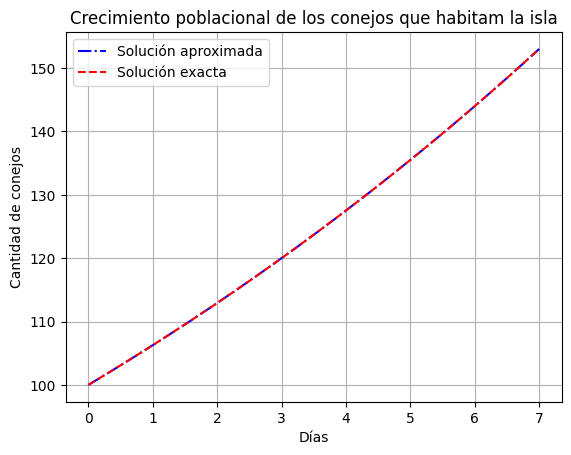

In [ ]:
solucion_exacta = [100 * pow(6/5, t/3) for t in tiempo]

plt.plot(tiempo, poblacion, '-.', color = 'blue', label='Solución aproximada')

plt.plot(tiempo, solucion_exacta, '--', color = 'red', label='Solución exacta')

plt.title('Crecimiento poblacional de los conejos que habitam la isla')

plt.xlabel('Días')

plt.ylabel('Cantidad de conejos')

plt.grid(True)

plt.legend()

plt.show()